## Importing the essential libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset over here

In [6]:
data=pd.read_csv("Crop_Recommendation.csv")

In [7]:
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


## Taking care of duplicate observations if present over here

In [8]:
data.duplicated().sum()

0

## Taking care of missing values if present over here

In [10]:
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

## Filtering all the numerical features over here

In [12]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
for feature in numerical_features:
  print(feature)

Nitrogen
Phosphorus
Potassium
Temperature
Humidity
pH_Value
Rainfall


In [13]:
data[numerical_features]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


## Filtering all the categorical features over here

In [15]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
for feature in cat_features:
  print(feature)

Crop


In [16]:
data[cat_features]

,Crop
0,Rice
1,Rice
2,Rice
3,Rice
4,Rice
...,...
2195,Coffee
2196,Coffee
2197,Coffee
2198,Coffee


## Encoding the categorical features into numerical features over here

In [18]:
for feature in cat_features:
  feature_mapping={category:index for index,category in enumerate(data[feature].unique())}
  data[feature]=data[feature].map(feature_mapping)

In [19]:
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


## Creating the features and labels over here

In [21]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [25]:
data['Crop'].value_counts()

Crop
0     100
1     100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
2     100
21    100
Name: count, dtype: int64

## Splitting the dataset into training set and testing set over here

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model on the training dataset over here

In [31]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Evaluating the performance of the model on the testing dataset

In [32]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[13 13]
 [13 13]
 [12 12]
 [ 2  2]
 [ 7  7]
 [20  0]
 [ 5  5]
 [ 3  3]
 [14 14]
 [10 10]
 [ 5  5]
 [21 21]
 [ 8  8]
 [ 6  6]
 [11 11]
 [15 15]
 [21 21]
 [ 8  8]
 [21 21]
 [11 11]
 [18 18]
 [ 7  7]
 [ 3  3]
 [20 20]
 [19 19]
 [21 21]
 [ 8  8]
 [16 16]
 [ 5  5]
 [ 3  3]
 [ 9  9]
 [ 0  0]
 [ 1  1]
 [14 14]
 [18 18]
 [19 19]
 [11 11]
 [11 11]
 [13 13]
 [ 5  5]
 [ 1  1]
 [ 7  7]
 [ 4  4]
 [13 13]
 [ 4  4]
 [ 6  6]
 [ 3  3]
 [ 3  3]
 [19 19]
 [ 6  6]
 [ 5  5]
 [ 7  7]
 [15 15]
 [14 14]
 [ 4  4]
 [10 10]
 [17 17]
 [11 11]
 [ 8  8]
 [19 19]
 [16 16]
 [ 6  6]
 [13 13]
 [ 0  0]
 [14 14]
 [15 15]
 [12 12]
 [21 21]
 [15 15]
 [16 16]
 [18 18]
 [ 9  9]
 [ 3  3]
 [ 1  1]
 [12 12]
 [ 5  5]
 [ 2  2]
 [ 1  1]
 [20 20]
 [11 11]
 [ 0  0]
 [ 7  7]
 [13 13]
 [13 13]
 [14 14]
 [19 19]
 [ 1  1]
 [ 8  8]
 [ 5  5]
 [17 17]
 [ 7  7]
 [20 20]
 [ 6  6]
 [12 12]
 [ 6  6]
 [ 1  1]
 [21 21]
 [20 20]
 [ 8  8]
 [ 2  2]
 [16 16]
 [20 20]
 [ 6  6]
 [10 10]
 [10 10]
 [ 0  0]
 [13 13]
 [21 21]
 [ 4  4]
 [14 14]
 [14 14]
 

## Checking the metrics for the classification model over here

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

0.9772727272727273

<Axes: >

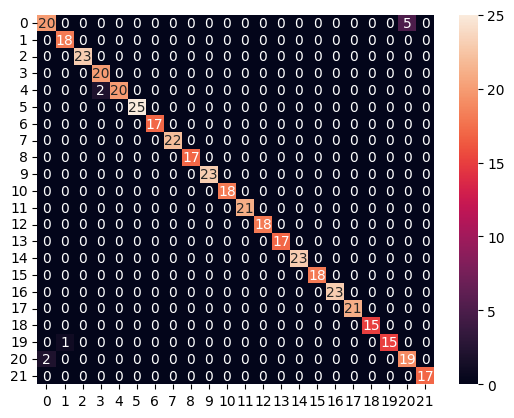

In [34]:
sns.heatmap(cm,annot=True)

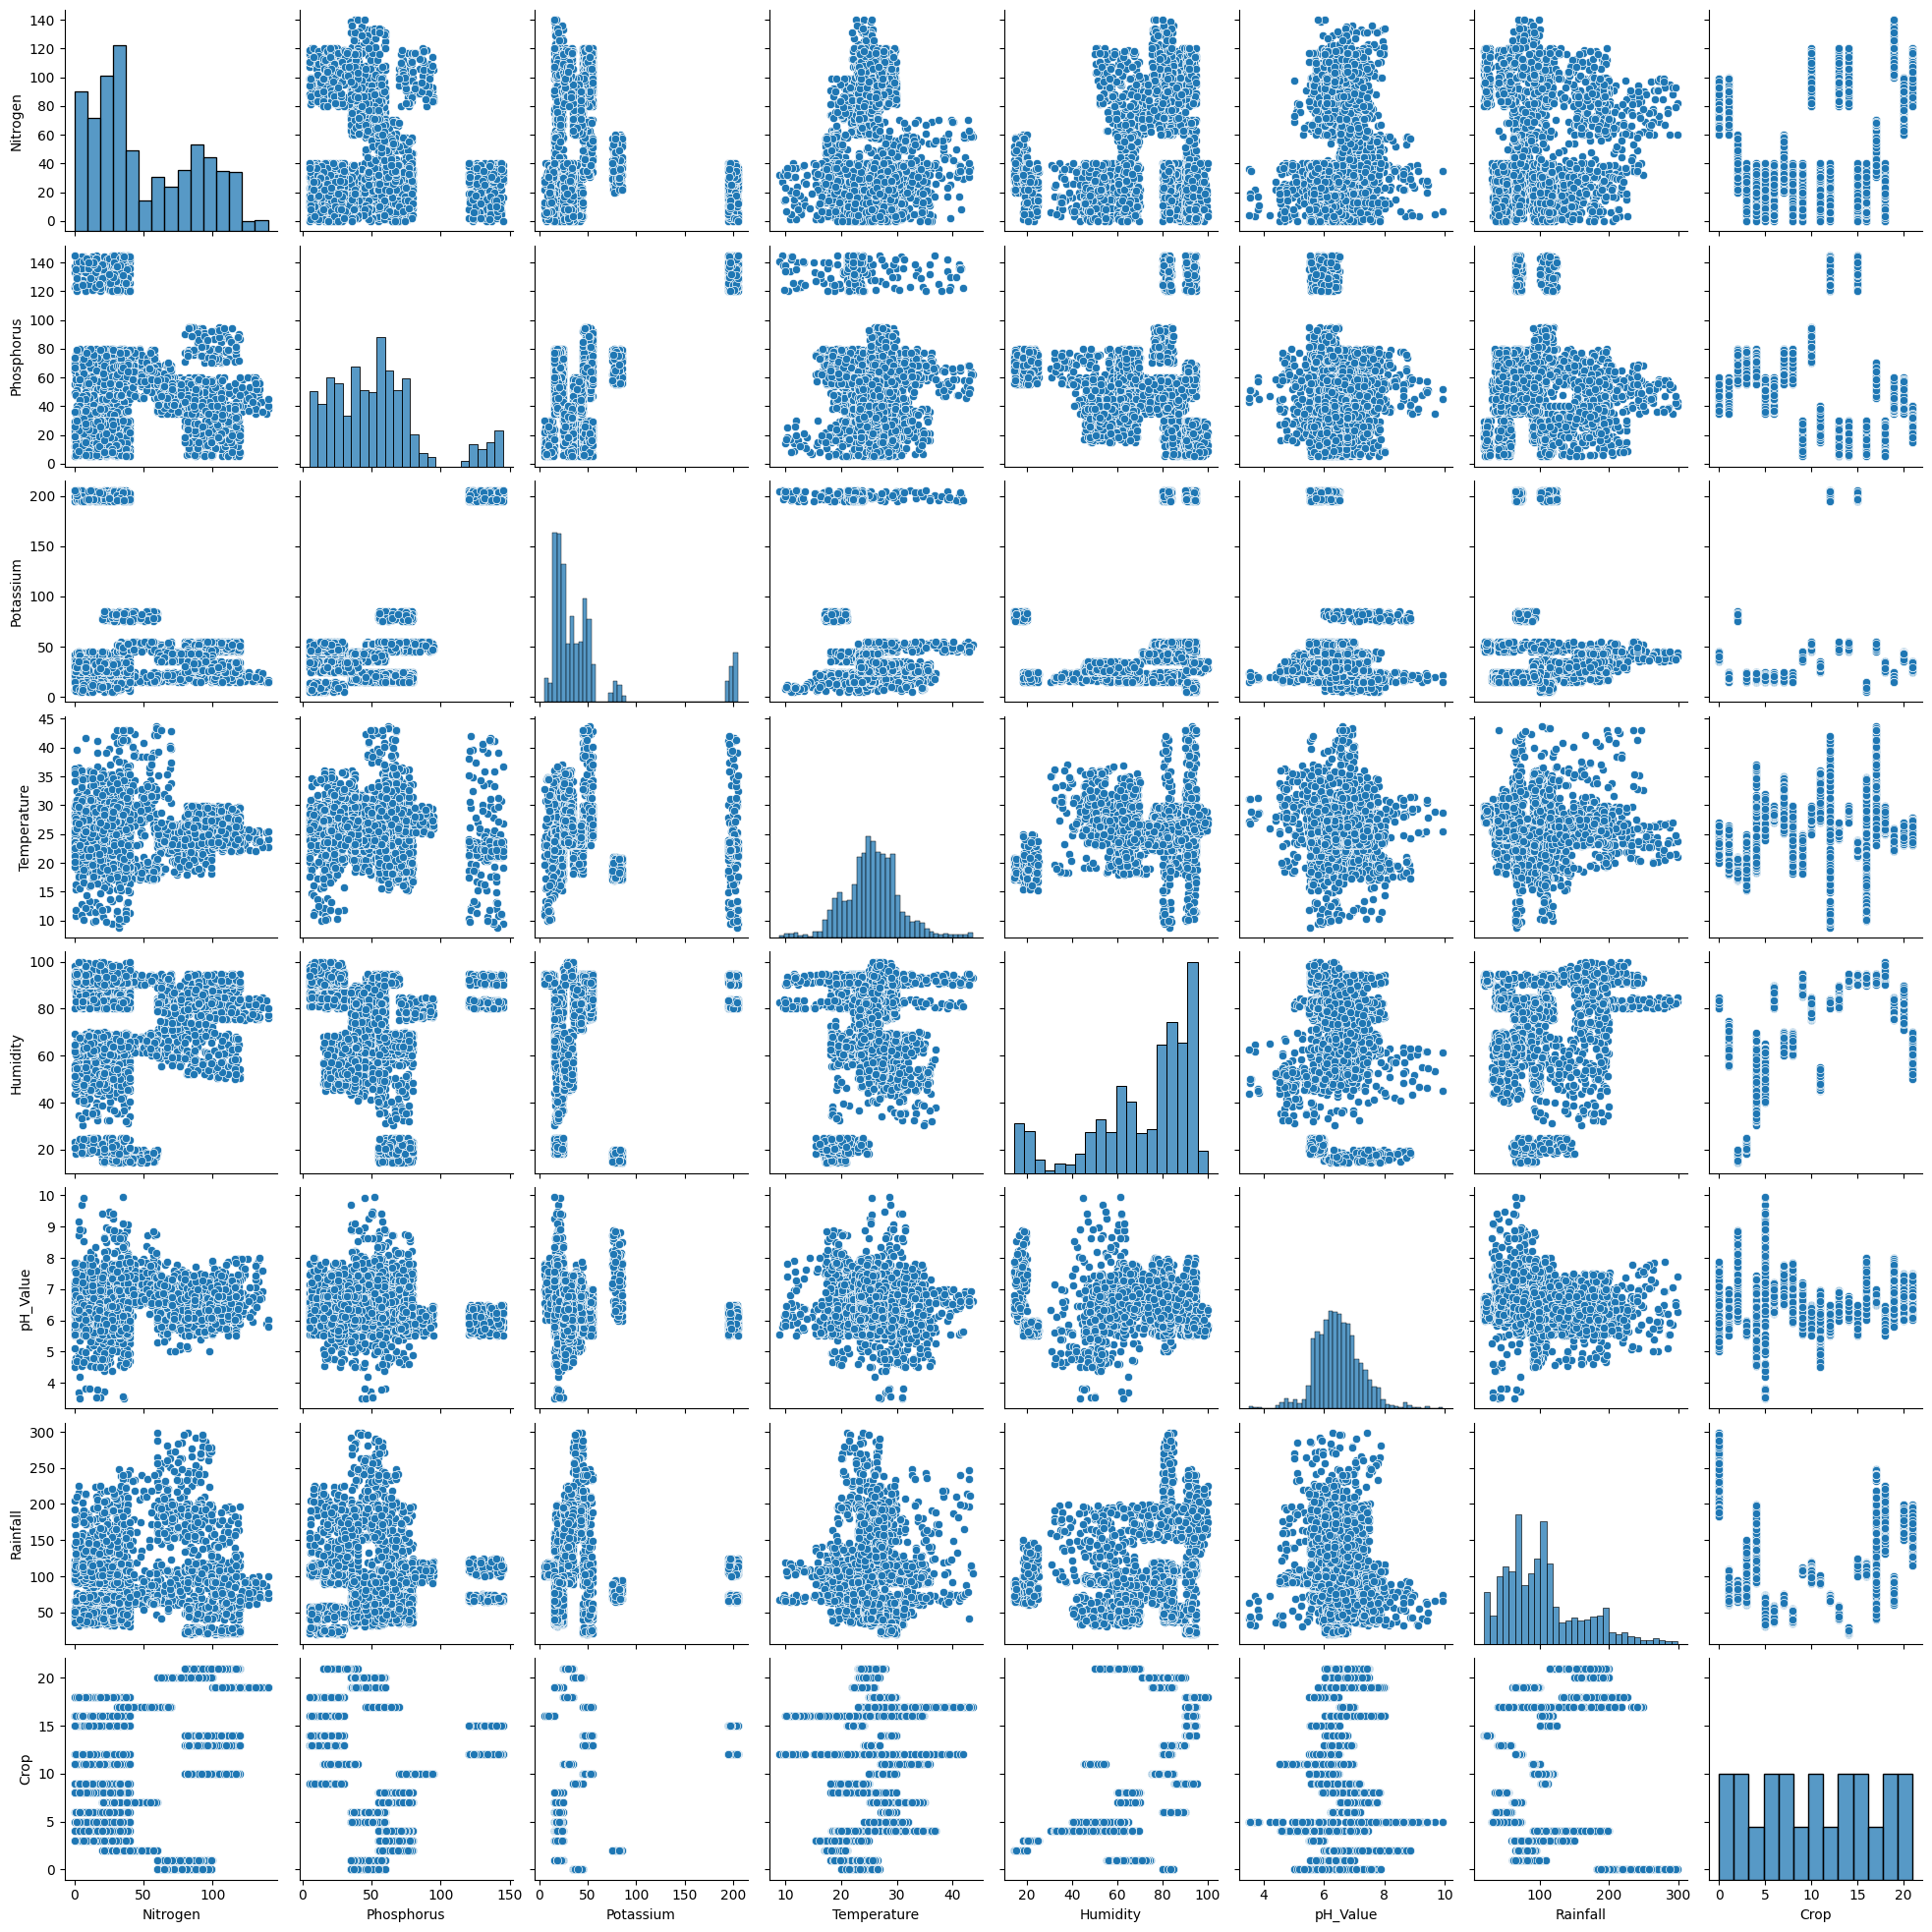

In [35]:
sns.pairplot(data)